In [2]:
## Import the necessary libraries:-


import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (confusion_matrix, accuracy_score, recall_score,classification_report,
                             precision_score,roc_auc_score,f1_score,mean_absolute_error,roc_curve)


import pickle
import logging 
import traceback

In [3]:
## Load the dataset using pandas:

df = pd.read_csv(r"F:\Ineuron DS\Assignment\Loan_Data.csv")

In [5]:
# info 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
# description of data

df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
# Checking for missing values 

df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
# percentage of missing value 

null_features = []

for i in df:
    null_values = (df[i].isnull().sum()/len(df))*100
    if null_values != 0:
        print(f'{i} has {round(null_values,3)} % of missing values')
        null_features.append(i)

Gender has 2.117 % of missing values
Married has 0.489 % of missing values
Dependents has 2.443 % of missing values
Self_Employed has 5.212 % of missing values
LoanAmount has 3.583 % of missing values
Loan_Amount_Term has 2.28 % of missing values
Credit_History has 8.143 % of missing values


In [5]:
# Droping Loan id as it has 614 unique values 

df.drop('Loan_ID',axis = 1,inplace = True)

In [6]:
# numerical and categorical features

numerical_features =[i  for i in df.columns if df[i].dtype != 'O' ]

categorical_features = [i  for i in df.columns if df[i].dtype == 'O' ]

In [7]:
numerical_features

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [15]:
categorical_features

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [16]:
# No.of class in categorical variable


for i in categorical_features:
    cat = len(df[i].unique())
    print(f"{i} has total of {cat} categories")

Gender has total of 3 categories
Married has total of 3 categories
Dependents has total of 5 categories
Education has total of 2 categories
Self_Employed has total of 3 categories
Property_Area has total of 3 categories
Loan_Status has total of 2 categories


C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


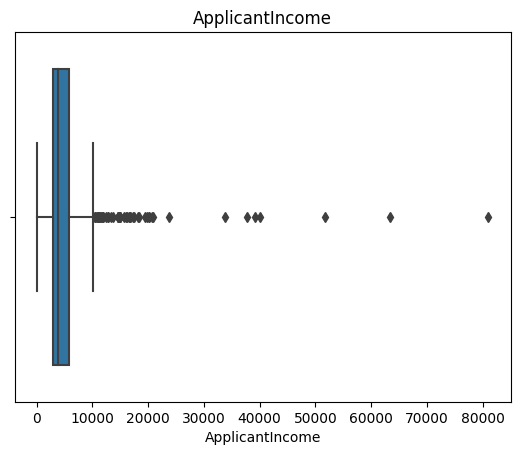

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


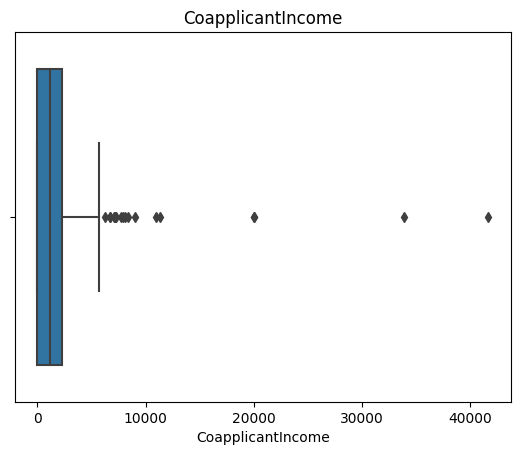

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


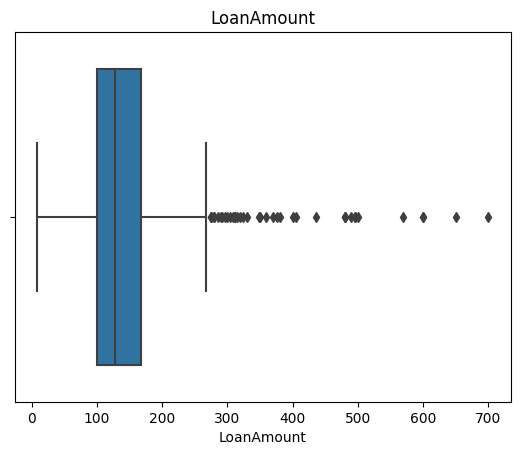

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


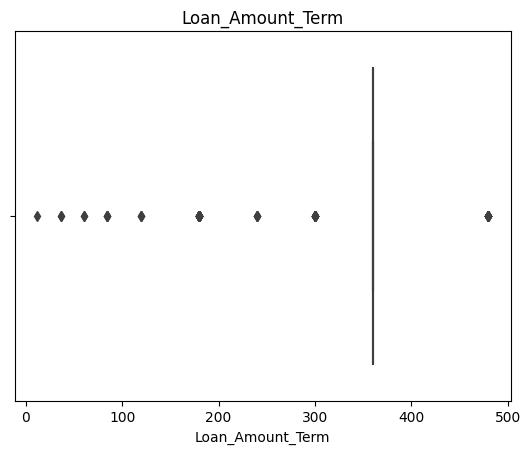

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


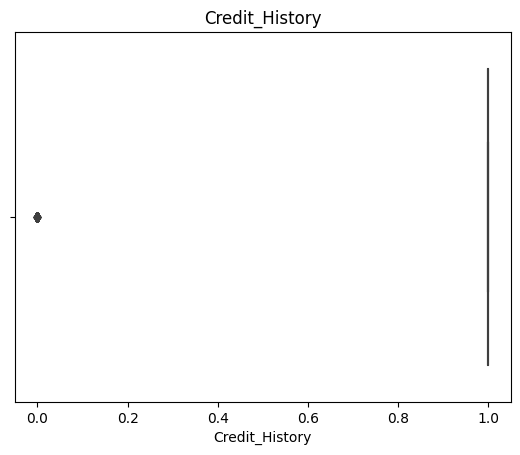

In [17]:
# Outliers

for i in numerical_features:
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()

In [18]:
# Outliers count 

for i in numerical_features:
    per_75 = df[i].quantile(0.75)
    per_25 = df[i].quantile(0.25)
    iqr = per_75 - per_25
    
    upper_limit = per_75 + 1.5 *(iqr)
    lower_limit = per_25 + 1.5*(iqr)
    
    outlier = len(df) - len(df[(df[i]>upper_limit) | (df[i] < lower_limit)]) 
    
    print(f"{i} has {round((outlier/len(df))*100,3)}% of outliers")

ApplicantIncome has 7.655% of outliers
CoapplicantIncome has 9.121% of outliers
LoanAmount has 9.935% of outliers
Loan_Amount_Term has 85.668% of outliers
Credit_History has 85.505% of outliers


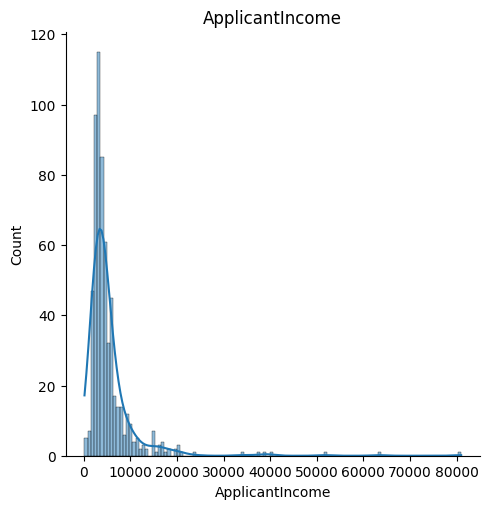

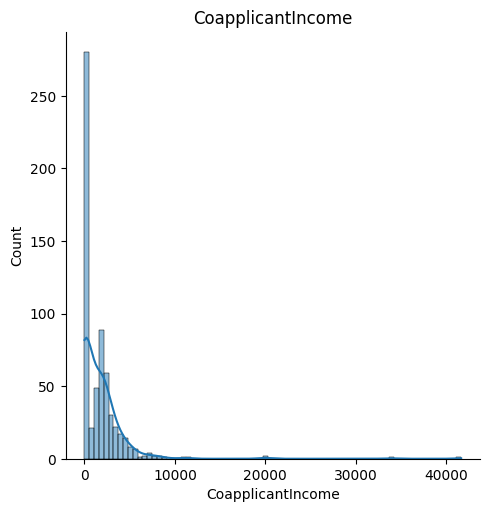

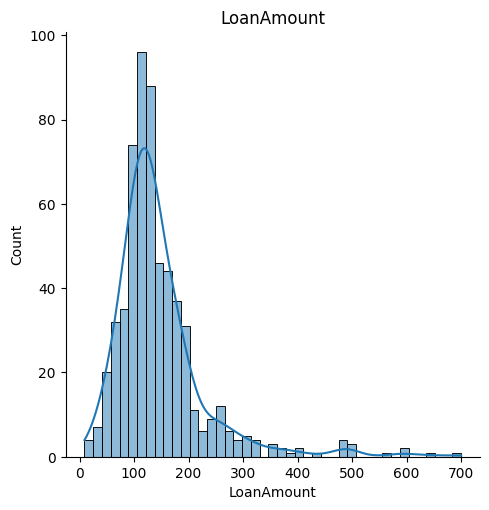

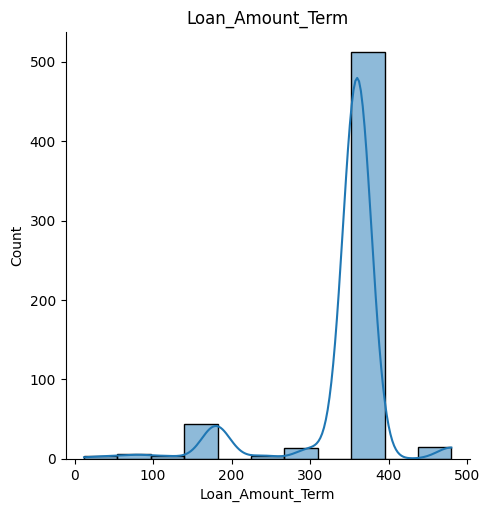

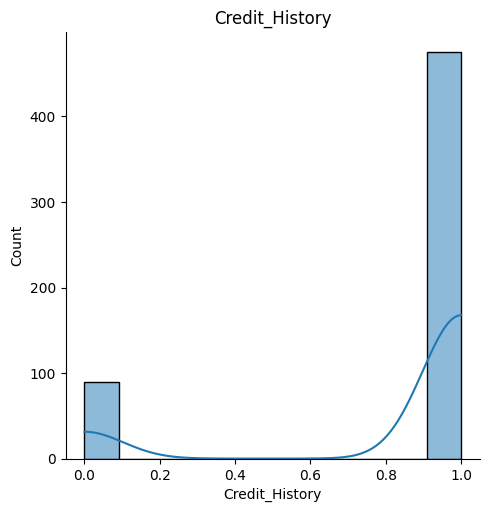

In [19]:
# Distribution of features 

for i in numerical_features:
    sns.displot(df[i],kde = True)
    plt.title(i)
    plt.show()

In [20]:
numerical_features

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

ApplicantIncome,CoapplicantIncome,LoanAmount are rightly skewed and Loan_Amount_Term id left skewed


In [8]:
# Imputing null features

for i in null_features:
    df[i].fillna(df[i].mode()[0],inplace = True)


In [22]:
# checking missing values

df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

EDA

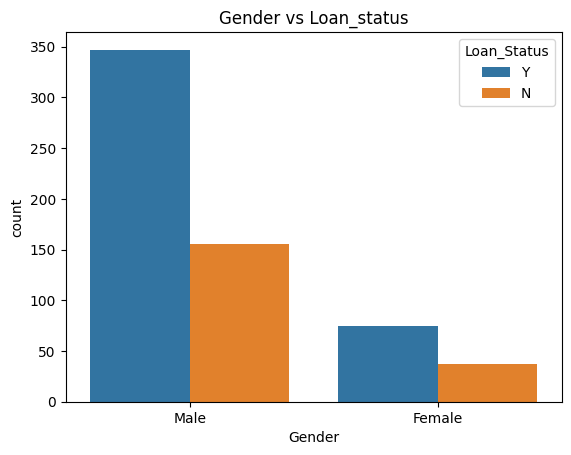

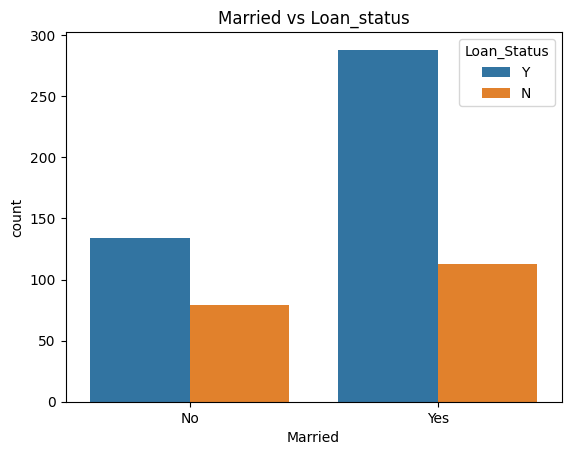

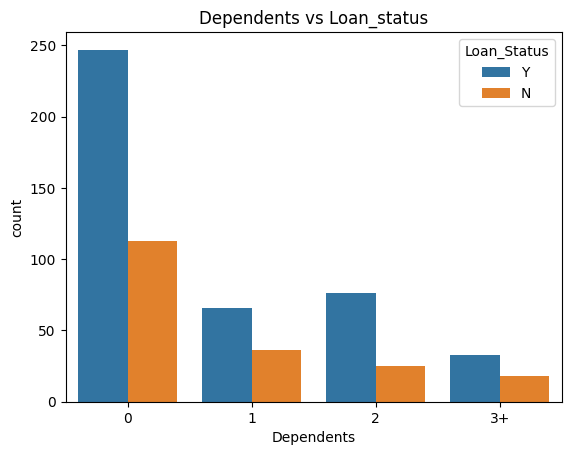

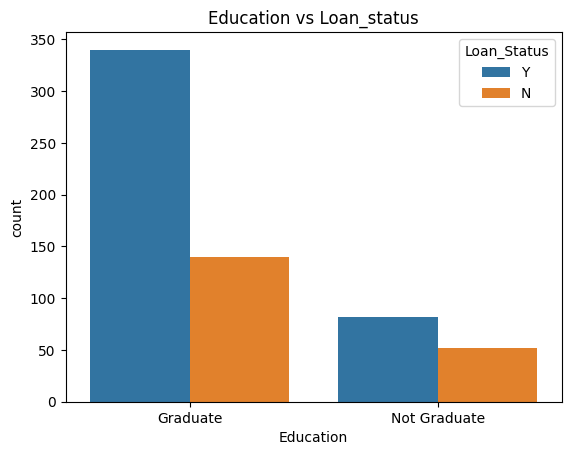

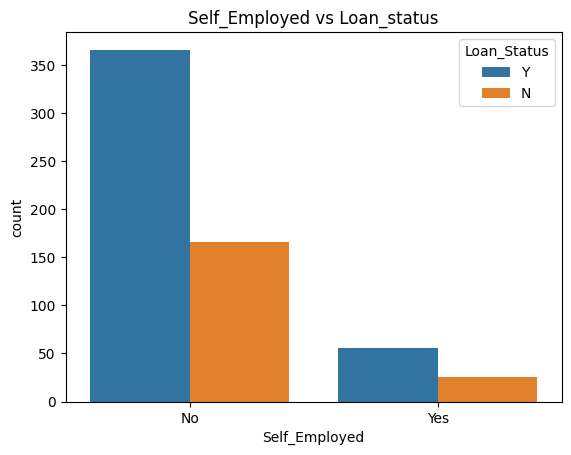

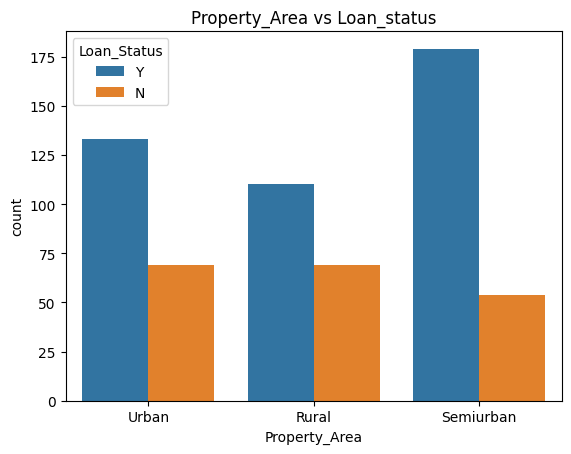

In [23]:
for i in categorical_features[:-1]:
    sns.countplot(x = df[i], hue = df['Loan_Status'])
    plt.title(f"{i} vs Loan_status")
    plt.xlabel(i)
    plt.ylabel('count')
    plt.show()

In [24]:
# handling outliers 

right_skewed = ['ApplicantIncome','CoapplicantIncome','LoanAmount']

for i in right_skewed:
    df[i] = np.log(df[i]+1)


C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


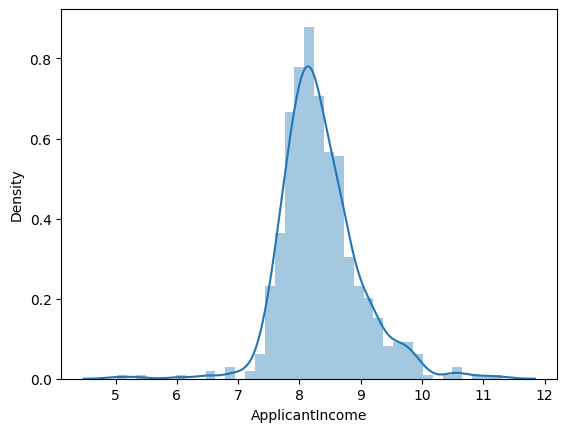

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


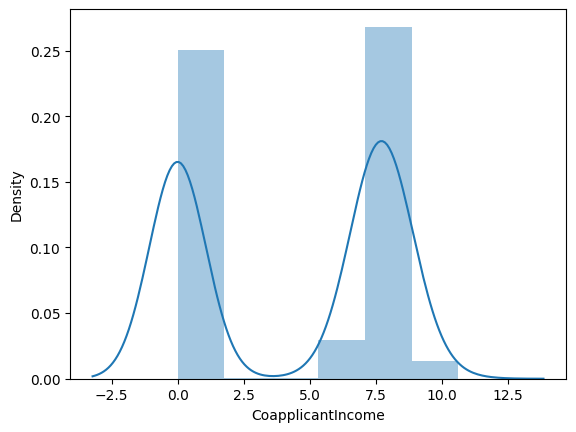

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


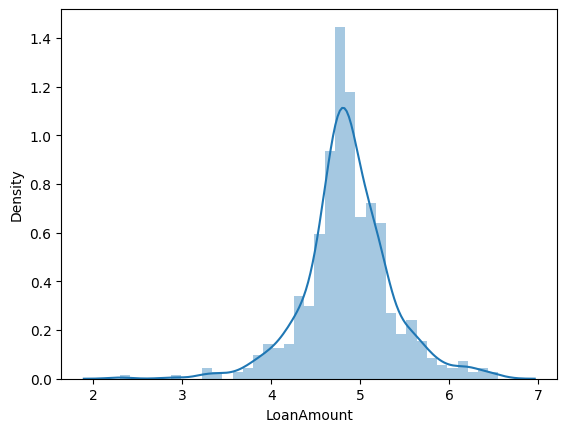

In [25]:
# checking the distribution of right skewed feature 

for i in right_skewed:
    sns.distplot(df[i])
    plt.show()

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


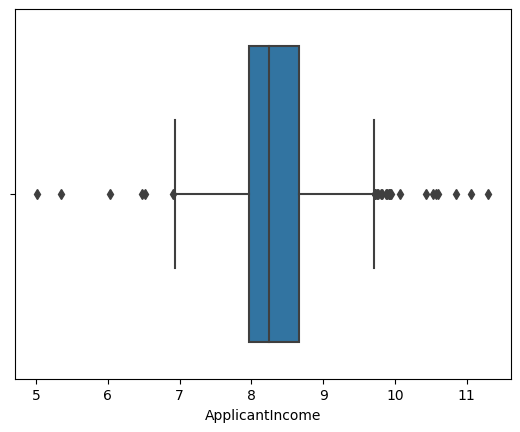

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


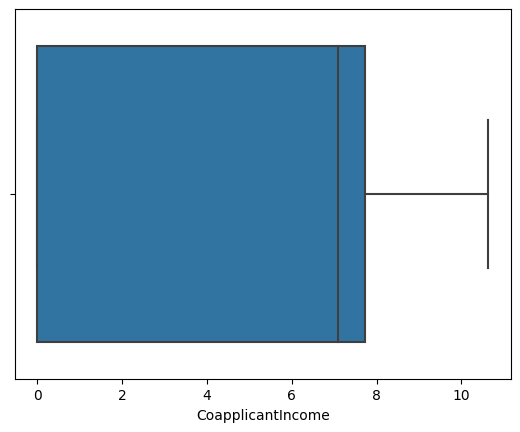

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


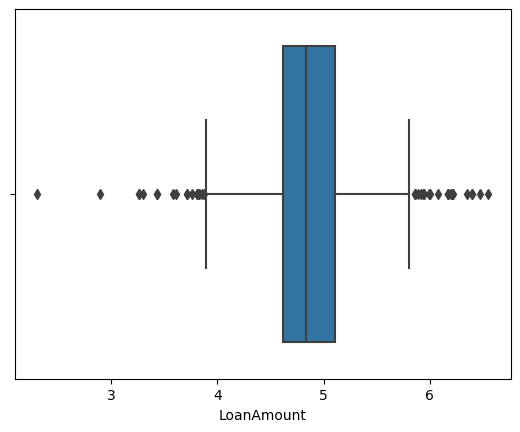

In [26]:
# Checking the outliers 

for i in right_skewed:
    sns.boxplot(df[i])
    plt.show()

In [9]:
# Transformation of left skewed data

df['Loan_Amount_Term'] = df['Loan_Amount_Term']**3

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='Loan_Amount_Term', ylabel='Density'>

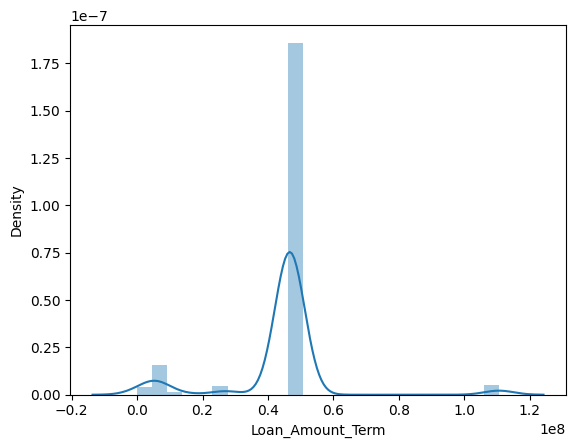

In [28]:
## Distribution after transformation

sns.distplot(df['Loan_Amount_Term'])

In [10]:
# converting categorical features to integer 

df['Loan_Amount_Term'] = df['Loan_Amount_Term'].astype(int)

df.Dependents.replace({'0':0,'1':1,"2":2,"3+":3}, inplace = True)
df['Dependents'] = df['Dependents'].astype(int)

df['Credit_History'] = df['Credit_History'].astype(int)

df.Gender.replace({"Male":0, "Female":1}, inplace=True)

df.Married.replace({"No":0, "Yes":1}, inplace=True)

df.Education.replace({"Not Graduate":0, "Graduate":1}, inplace=True)

df.Self_Employed.replace({"No":0, "Yes":1}, inplace=True)

df.Property_Area.replace({"Rural":0, "Urban":1, "Semiurban":2}, inplace=True)

df.Loan_Status.replace({"N":0, "Y":1}, inplace=True)

In [11]:
# Dependent and Independent Features

X = df.drop(['Loan_Status'],axis = 1)
y = df['Loan_Status']

# Train Test Split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.30, random_state=42)


In [27]:
# Standardization

scalar = preprocessing.StandardScaler()

for i in df:
    if i not in ['Loan_Status']:
        train_feature = np.array(X_train[i]).reshape(-1,1)
        test_feature = np.array(X_test[i]).reshape(-1,1)
        
        train_feature_scaled = scalar.fit_transform(train_feature)
        test_feature_scaled = scalar.transform(test_feature)
        
        X_train[i] = train_feature_scaled.reshape(-1)
        X_test[i] = test_feature_scaled.reshape(-1)
        
    if i in ['Loan_Status']:
        train_feature = np.array(y_train).reshape(-1,1)
        test_feature = np.array(y_test).reshape(-1,1)
        
        train_feature_scaled = scalar.fit_transform(train_feature)
        test_feature_scaled = scalar.transform(test_feature)
        
        y_train = train_feature_scaled.reshape(-1,1)
        y_test = test_feature_scaled.reshape(-1,1)

In [32]:
# Model training for Informational_Duration


models = { "Decision Tree": DecisionTreeClassifier(),
          "Random Forest": RandomForestClassifier(),
          "Gradient Boosting": GradientBoostingClassifier(),
          "AdaBoost classifier": AdaBoostClassifier(),
          "Xg boost": XGBClassifier
          () 
            }


params={"Decision Tree": 
        {
        # "criterion":['squared_error','friedman_mse','absolute_error'],
        'max_depth':[2,4,6],
        'min_samples_split':[2,4,6],
        'random_state':[42]
        },
        
        "Random Forest":
        {
        'n_estimators': [100,112,124,143,156],
        'min_samples_split':[2,4,6],
        'random_state':[42],
        'max_depth':[4,5,2]
        },
        
        "Gradient Boosting":
        {
        'learning_rate':[0.04,0.05,0.09,0.004],
        'n_estimators':[143,150,164,175],
        'min_samples_split':[2,4,6],
        'max_depth':[4,5,2],
        'random_state':[42]
        },
        
        "AdaBoost classifier":
        {
        "n_estimators":[143,150,164,175],
        'learning_rate':[0.04,0.05,0.09,0.004],
        'random_state':[42]
        },
        "Xg boost":
        {
        'learning_rate':[0.04,0.05,0.09,0.004],
         'n_estimators':[143,150,164,175],
         'max_depth' : [4,6],
         'random_state':[42]
        
       }
       }

In [33]:
# Model building

logging.basicConfig(filename="log_file.log",level=logging.INFO,format='%(asctime)s %(levelname)s %(message)s')


class model_training:
    
    def __init__(self,X_train,X_test,y_train,y_test,models,param_grid):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.models = models
        self.param_grid = param_grid

    def eval_model(self):
    

        report = {}
        classificationreport = {}
        final_model = {}
        confusionmatrix = {}


        for i in models:
            
            mo_dels = models[i]

            model = GridSearchCV(mo_dels,cv = 2, param_grid = params[i])

            model.fit(X_train,y_train)

            y_train_pred = model.predict(X_train)

            y_test_pred = model.predict(X_test)

            # Test and train scores

            train_model_score = accuracy_score(y_train,y_train_pred)

            test_model_score = accuracy_score(y_test,y_test_pred)

            classificationreport[i] = classification_report(y_test,y_test_pred)

            precision = precision_score(y_test,y_test_pred,average = 'weighted')

            recall = recall_score(y_test,y_test_pred,average = 'weighted')

            f1score = f1_score(y_test,y_test_pred,average = 'weighted')

            confusionmatrix[i] = confusion_matrix(y_test,y_test_pred)

            report[i] = {'accuray_score':test_model_score,
                         'precision':precision,
                         'recall':recall,
                         'f1score':f1score}

            final_model[i] = model

            logging.info('Model training completed')

        return report,classificationreport,final_model,confusionmatrix




    
    
    def save_model(self,file_name,model_config):
        try:
            with open(file_name, "wb") as file_obj:
                pickle.dump(model_config,file_obj)
                
                logging.info('File Saved')
                
        except Exception as e:
            logging.error("Exception occurred", traceback.format_exc())
            
            


In [34]:
# Model Training

model_trained = model_training(X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test,
                                             models=models,param_grid = params)

report,classificationreport,final_model,confusionmatrix = model_trained.eval_model()

In [35]:
scores = pd.DataFrame.from_dict(report, orient='index')

model_score = scores[scores['accuray_score'] == max(scores['accuray_score'])].values[0][0]

best_model = scores[scores['accuray_score'] == max(scores['accuray_score'])].index[0]

model_config = final_model[best_model]

classifcation_report = classificationreport[best_model]

confusion_matrix = confusionmatrix[best_model]


# Saving the model as pickle file 

model_trained.save_model('model.pickle',model_config)


In [36]:
print(best_model)
print(model_score)

AdaBoost classifier
0.7837837837837838


In [29]:
# Roc and Auc curve

y_test_pred = {}

for i in final_model:
    y_test_pred[i] = final_model[i].predict(X_test)
print(y_test_pred)
    

NameError: name 'final_model' is not defined

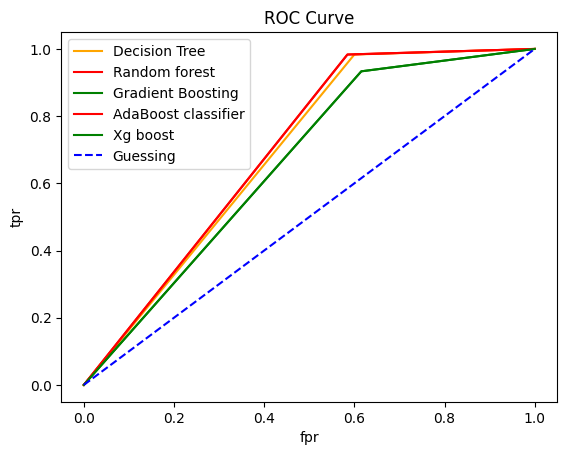

In [55]:
fpr_lr,tpr_lr,thershold = roc_curve(y_test,y_test_pred['Decision Tree'])
fpr_rf,tpr_rf,thershold = roc_curve(y_test,y_test_pred['Random Forest'])
fpr_svc,tpr_svc,thershold = roc_curve(y_test,y_test_pred['Gradient Boosting'])
fpr_rf,tpr_rf,thershold = roc_curve(y_test,y_test_pred['AdaBoost classifier'])
fpr_svc,tpr_svc,thershold = roc_curve(y_test,y_test_pred['Xg boost'])

plt.plot(fpr_lr,tpr_lr,color = 'Orange', label = 'Decision Tree')
plt.plot(fpr_rf,tpr_rf,color = 'Red', label = 'Random forest')
plt.plot(fpr_svc,tpr_svc,color = 'Green', label = 'Gradient Boosting')
plt.plot(fpr_rf,tpr_rf,color = 'blue', label = 'AdaBoost classifier')
plt.plot(fpr_svc,tpr_svc,color = 'pink', label = 'Xg boost')

plt.plot([0,1],[0,1],color = 'Blue',linestyle = '--', label = 'Guessing')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve')
plt.legend()
plt.show()